# Time Series

Date and time are two variables that unlock an enormous amount of additional quality and capability in datasets, but the format that Python uses to record data can be slightly differently to how we are used to thinking about time.

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns

- [W3 Python dates](https://www.w3schools.com/python/gloss_python_date.asp)
- [G4G Pandas dates](https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/)
- [Pandas Timeseries docs](https://pandas.pydata.org/docs/user_guide/timeseries.html)

## Using a dataset

In [2]:
# this is the CO2 data collected by the NOAA at Mauna Loa observatory in Hawai'i.
mlco = pd.read_csv('https://datahub.io/core/co2-ppm/r/co2-mm-mlo.csv')
mlco

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...
722,2018-05-01,2018.375,411.24,411.24,407.91,24
723,2018-06-01,2018.458,410.79,410.79,408.49,29
724,2018-07-01,2018.542,408.71,408.71,408.32,27
725,2018-08-01,2018.625,406.99,406.99,408.90,30


Python won't automatically detect the Date column as a date-formatted data, which can be displayed when the `dtype` below displays 'object'.

In [3]:
mlco['Date']

0      1958-03-01
1      1958-04-01
2      1958-05-01
3      1958-06-01
4      1958-07-01
          ...    
722    2018-05-01
723    2018-06-01
724    2018-07-01
725    2018-08-01
726    2018-09-01
Name: Date, Length: 727, dtype: object

Pandas has the ability to change this with the `to_datetime` function, which can accept an entire column as a parameter.

In [4]:
mlco['datetime'] = pd.to_datetime(mlco['Date'])
mlco

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days,datetime
0,1958-03-01,1958.208,315.71,315.71,314.62,-1,1958-03-01
1,1958-04-01,1958.292,317.45,317.45,315.29,-1,1958-04-01
2,1958-05-01,1958.375,317.50,317.50,314.71,-1,1958-05-01
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1,1958-06-01
4,1958-07-01,1958.542,315.86,315.86,314.98,-1,1958-07-01
...,...,...,...,...,...,...,...
722,2018-05-01,2018.375,411.24,411.24,407.91,24,2018-05-01
723,2018-06-01,2018.458,410.79,410.79,408.49,29,2018-06-01
724,2018-07-01,2018.542,408.71,408.71,408.32,27,2018-07-01
725,2018-08-01,2018.625,406.99,406.99,408.90,30,2018-08-01


We can then use seaborn to plot multiple columns on the same chart.

<AxesSubplot:xlabel='datetime', ylabel='Interpolated'>

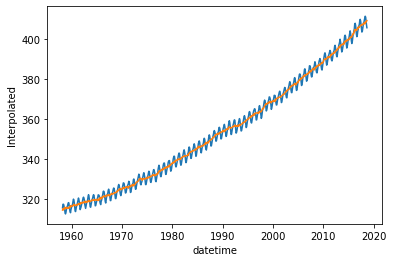

In [5]:
sns.lineplot(data=mlco,x='datetime',y='Interpolated')
sns.lineplot(data=mlco,x='datetime',y='Trend')

These libraries work just as well with larger, less complete or messier datasets, and pandas contains a number of tools for cleaning data. Without the `skiprows` parameter, the command below will return a parser error. In this case, there are some header lines and comments before the dataset begins. The dataset in use here is the hourly weather data from Knock Airport.

*Note: there will be warning once this command runs without the low_memory parameter, it also showed up in Brian's demonstration and just concerned the mixed datatypes in some columns.*

In [15]:
# nrows allows you to determine the numbers of rows to import
df = pd.read_csv(
    'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', 
    skiprows=23, nrows=1000, low_memory=False)
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10-sep-1996 18:00,0,0.0,0,13.7,0,12.3,11.1,13.2,84,...,2,10,2,340,2,11,0.1,30000,59,7
996,10-sep-1996 19:00,0,0.0,0,12.8,0,12.0,11.3,13.4,91,...,2,9,2,340,2,11,0.0,24000,55,7
997,10-sep-1996 20:00,0,0.0,0,12.4,0,11.7,11.1,13.2,92,...,2,7,2,340,2,11,0.0,24000,34,7
998,10-sep-1996 21:00,0,0.0,0,12.2,0,11.6,11.1,13.2,93,...,2,6,2,340,2,11,0.0,24000,34,7


In [7]:
df['datetime'] = pd.to_datetime(df['date'])
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,datetime
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,25,81,0.0,35000,32,5,1996-04-10 14:00:00
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,25,82,0.0,40000,45,5,1996-07-31 08:00:00
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,80,81,0.0,8000,32,7,1996-07-31 09:00:00
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,25,82,0.0,28000,35,6,1996-07-31 10:00:00
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,2,11,0.0,40000,40,6,1996-07-31 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10-sep-1996 18:00,0,0.0,0,13.7,0,12.3,11.1,13.2,84,...,10,2,340,2,11,0.1,30000,59,7,1996-09-10 18:00:00
996,10-sep-1996 19:00,0,0.0,0,12.8,0,12.0,11.3,13.4,91,...,9,2,340,2,11,0.0,24000,55,7,1996-09-10 19:00:00
997,10-sep-1996 20:00,0,0.0,0,12.4,0,11.7,11.1,13.2,92,...,7,2,340,2,11,0.0,24000,34,7,1996-09-10 20:00:00
998,10-sep-1996 21:00,0,0.0,0,12.2,0,11.6,11.1,13.2,93,...,6,2,340,2,11,0.0,24000,34,7,1996-09-10 21:00:00


<AxesSubplot:xlabel='datetime', ylabel='temp'>

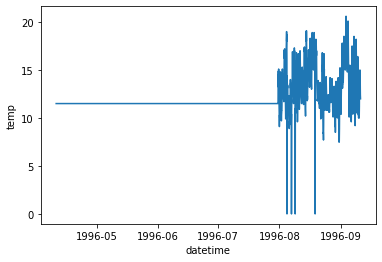

In [8]:
sns.lineplot(data=df,x='datetime',y='temp')

Above, you can see where there is an initial reading in April, and then the main dataset starts on the 31st July.

<AxesSubplot:xlabel='datetime', ylabel='temp'>

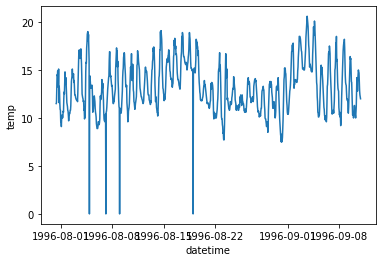

In [9]:
sns.lineplot(data=df[1:],x='datetime',y='temp')

## Synthesising Time Series

You can generate dates or date-times with the `date_range` and `to_datetime` functions. For `date_range`, there are [lots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html) of different frequencies which you can use to base the selection.

In [10]:
dti = pd.to_datetime(
    ['1/1/2018', np.datetime64('2018-01-01'), dt.datetime(2018, 1, 1)]
)
dti

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [13]:
idx = pd.date_range('2018-01-01', periods=72, freq='H')
idx

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               '2018-01-01 10:00:00', '2018-01-01 11:00:00',
               '2018-01-01 12:00:00', '2018-01-01 13:00:00',
               '2018-01-01 14:00:00', '2018-01-01 15:00:00',
               '2018-01-01 16:00:00', '2018-01-01 17:00:00',
               '2018-01-01 18:00:00', '2018-01-01 19:00:00',
               '2018-01-01 20:00:00', '2018-01-01 21:00:00',
               '2018-01-01 22:00:00', '2018-01-01 23:00:00',
               '2018-01-02 00:00:00', '2018-01-02 01:00:00',
               '2018-01-02 02:00:00', '2018-01-02 03:00:00',
               '2018-01-02 04:00:00', '2018-01-02 05:00:00',
               '2018-01-02 06:00:00', '2018-01-02 07:00:00',
               '2018-01-

Generate a random number for each item in the datetime index. The `random` function generates a random number between 0 and 1, and the column parameter must be passed a list or an array, even if they only contain one item.

In [28]:
rng = np.random.default_rng()
ts = pd.DataFrame(data=rng.random(len(idx)),index=idx,columns=['admissions'])

In [29]:
ts

,admissions
2018-01-01 00:00:00,0.986199
2018-01-01 01:00:00,0.576919
2018-01-01 02:00:00,0.236788
2018-01-01 03:00:00,0.454201
2018-01-01 04:00:00,0.899174
...,...
2018-01-03 19:00:00,0.722354
2018-01-03 20:00:00,0.348249
2018-01-03 21:00:00,0.874142
2018-01-03 22:00:00,0.738070


## Poisson Distribution Example

[NumPy Docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson)

From [Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution): "a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event."

The two previous datasets imported into this notebook are perfect examples of the type of data that the Poisson distribution can work with.

We can use the same process as above to generate a Poisson-distributed dataset, with the first parameter being the <i>lambda</i>, or expected number of events.

In [58]:
rng = np.random.default_rng()
length = len(idx)
pois = rng.poisson(5, length)
fats = rng.poisson(8, length)
ts = pd.DataFrame(data=pois,index=idx,columns=['admissions'])
ts['fatalities'] = fats

In [59]:
ts

,admissions,fatalities
2018-01-01 00:00:00,7,9
2018-01-01 01:00:00,2,6
2018-01-01 02:00:00,6,5
2018-01-01 03:00:00,5,5
2018-01-01 04:00:00,1,4
...,...,...
2018-01-03 19:00:00,3,6
2018-01-03 20:00:00,4,8
2018-01-03 21:00:00,4,13
2018-01-03 22:00:00,4,4


## Accessing, Aggregation and Grouping

As with earlier lectures in both those module and the [Fundamentals of Data Analysis](https://github.com/kiehozero/atu-fundda2022) module, if you run the `mean` of each column, you will see that the values come close to that given in the `poisson` function, but it will rarely be the same due to the randomised nature of the data.

In [60]:
ts['fatalities'].mean()

7.958333333333333

As usual, you can use loc and iloc to slice the data as a single row or an array, and add functions to this selection.

In [61]:
ts.loc['2018-01-03 20:00:00']

admissions    4
fatalities    8
Name: 2018-01-03 20:00:00, dtype: int64

In [64]:
ts.iloc[68]

admissions    4
fatalities    8
Name: 2018-01-03 20:00:00, dtype: int64

In [69]:
ts.loc['2018-01-03 00:00:00':'2018-01-03 23:00:00'].mean()

admissions    4.166667
fatalities    7.875000
dtype: float64

But because the value is a datetime value, you don't need to include the time if you don't have to, as `loc` is inclusive of both the starting and ending values. This would not work with `iloc`.

In [70]:
ts.loc['2018-01-03'].mean()

admissions    4.166667
fatalities    7.875000
dtype: float64

You can also aggregate the values, using the `resample` function, which just passes an alpha-numeric parameter, such as <i>D</i> for day, <i>H</i> for hour, <i>M</i> for minutes, etc. This is useful for extremely large datasets where you don't necessarily need to work with every single measurement you have received.

In [78]:
ts.resample('3H').mean()

,admissions,fatalities
2018-01-01 00:00:00,5.000000,6.666667
2018-01-01 03:00:00,3.333333,8.000000
2018-01-01 06:00:00,5.000000,9.333333
2018-01-01 09:00:00,5.000000,9.000000
2018-01-01 12:00:00,4.000000,9.000000
2018-01-01 15:00:00,7.333333,9.000000
2018-01-01 18:00:00,6.666667,5.333333
2018-01-01 21:00:00,7.666667,6.000000
2018-01-02 00:00:00,8.000000,7.333333
2018-01-02 03:00:00,5.666667,9.666667
